# Project: Impact of Women in the Workforce - Gapminder
Catherine Taft 2022

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 


First I'd like to note that this is not my full report - <b>my report is a separate pdf</b> also submitted in the zip file. However I've copied relevant chunks over under each of the visualizations, as well as the conclusion and limitations sections.

I wanted to focus on women in the workforce and look at how the proportion of women in the workforce has changed over time in various regions, and how it's impacted birthrates, so I chose three datasets from Gapminder's data. One has the overall fertility rates (number of women per child), one has the education rates for women between 15 and 44 (mean years in school), one has the percentage of the workforce of any gender contributing to a family income, and one has the proportion of the workforce that is female. All of these data sets are formatted so that the columns are years, and the data is arranged per country. 


### Question(s) for Analysis

The questions I'm looking at are:

1.) How has the rate of women joining the workforce increased over time, and how does this compare across regions?
    - For this question I will use the full female labor participation dataframe and compare some different global regions.

2.) Is there a relationship between the average education level of women, birthrates, and the rate of women joining the workforce? How is this different in different regions?
    - For this last question I'll compare the data for rates of female education, the overall fertility rate (avg number of children per woman) and the female labor participation rates. I'll use the common years for all three datasets, which is   1990-2008.

In [708]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'axes.facecolor':'lightblue'})
sns.set(rc={'figure.figsize':(20,10)})

%matplotlib inline

In [608]:
# Upgrade pandas to use dataframe.explode() function. 
#!pip install --upgrade pandas==0.25.0;

<a id='wrangling'></a>
## Data Wrangling


### General Properties


In [791]:
total_fertility_df = pd.read_csv('children_per_woman_total_fertility.csv')
female_labor_participation_df = pd.read_csv('females_aged_25_54_labor_force_participation_rate_percent.csv')
mean_years_school_women_15_44_df = pd.read_csv('mean_years_in_school_women_of_reproductive_age_15_to_44.csv')

In [792]:
total_fertility_df.head(5)
#note - the region columns for all the below were added by me during the process and now appear since I reran the cells later

country       region  1799  1800  1801  1802  1803  1804  1805  \
0          Afghanistan  middle east  7.00  7.00  7.00  7.00  7.00  7.00  7.00   
1              Albania       europe  4.60  4.60  4.60  4.60  4.60  4.60  4.60   
2              Algeria       africa  6.99  6.99  6.99  6.99  6.99  6.99  6.99   
3               Angola       africa  6.93  6.93  6.93  6.93  6.93  6.93  6.93   
4  Antigua and Barbuda    caribbean  5.00  5.00  4.99  4.99  4.99  4.98  4.98   

   1806  ...  2090  2091  2092  2093  2094  2095  2096  2097  2098  2099  
0  7.00  ...  1.74  1.74  1.74  1.74  1.74  1.74  1.74  1.74  1.74  1.74  
1  4.60  ...  1.78  1.78  1.78  1.79  1.79  1.79  1.79  1.79  1.79  1.79  
2  6.99  ...  1.86  1.86  1.86  1.86  1.86  1.86  1.86  1.86  1.86  1.86  
3  6.94  ...  2.54  2.52  2.50  2.48  2.47  2.45  2.43  2.42  2.40  2.40  
4  4.97  ...  1.81  1.81  1.81  1.81  1.81  1.81  1.81  1.82  1.82  1.82  

[5 rows x 303 columns]

In [612]:
female_labor_participation_df.head(5)

country         region  1989  1990  1991  1992  1993  1994  1995  1996  \
0  Afghanistan    middle east  17.7  17.7  17.8  17.8  17.8  17.9  17.7  17.5   
1      Albania         europe  69.0  72.5  73.3  72.3  71.4  70.0  69.0  70.2   
2      Algeria         africa  10.6  10.7  10.8  11.0  11.2  11.5  11.8  12.3   
3       Angola         africa  88.0  88.0  88.0  88.2  88.3  88.3  88.2  88.2   
4    Argentina  latin america  61.2  62.5  63.7  65.0  66.1  66.2  67.0  68.0   

   ...  2009  2010  2011  2012  2013  2014  2015  2016  2017  2018  
0  ...  17.6  18.0  18.5  19.6  20.7  22.0  23.2  24.6  25.0  25.5  
1  ...  68.5  74.3  69.5  65.8  66.2  71.1  72.6  71.4  75.4  77.3  
2  ...  20.1  21.3  22.4  23.6  21.7  22.7  23.7  24.7  24.2  23.9  
3  ...  88.2  88.2  88.1  88.1  88.1  88.1  88.2  88.3  88.4  88.5  
4  ...  67.2  67.6  68.0  67.9  66.7  67.7  68.7  69.6  71.7  72.4  

[5 rows x 32 columns]

In [613]:
mean_years_school_women_15_44_df.head(5)

country       region  1969  1970  1971  1972  1973  1974  1975  \
0          Afghanistan  middle east   0.1   0.1   0.1   0.1   0.1   0.1   0.1   
1              Albania       europe   5.6   5.7   5.9   6.0   6.2   6.3   6.5   
2              Algeria       africa   1.4   1.5   1.6   1.7   1.8   1.9   2.1   
3               Angola       africa   0.9   1.0   1.0   1.1   1.1   1.2   1.2   
4  Antigua and Barbuda    caribbean   8.1   8.3   8.5   8.7   8.8   9.0   9.2   

   1976  ...  1999  2000  2001  2002  2003  2004  2005  2006  2007  2008  
0   0.1  ...   0.5   0.5   0.5   0.6   0.6   0.6   0.7   0.7   0.7   0.8  
1   6.6  ...   9.8   9.9  10.0  10.1  10.2  10.3  10.4  10.5  10.6  10.7  
2   2.2  ...   5.8   5.9   6.1   6.2   6.4   6.5   6.7   6.8   6.9   7.1  
3   1.3  ...   3.5   3.6   3.7   3.8   3.9   4.0   4.1   4.3   4.4   4.5  
4   9.4  ...  12.7  12.8  12.9  13.0  13.1  13.2  13.3  13.3  13.4  13.5  

[5 rows x 42 columns]

I really want to analyze these by region, not just specific countries, so I realized I needed to add a column to each dataframe to include geographic region. I did this manually and separated countries into the following regions: Europe, Asia, North America, Latin America, Caribbean, Middle East, Africa, and Oceania. I added that here but it shows up in the heads I called above because I've since gone back and rerun those cells.

In [614]:
#I ran this for all dfs to make sure it worked and that there were no typos (I actually caught a couple typos this way).
mean_years_school_women_15_44_df['region'].unique()

array(['middle east', 'europe', 'africa', 'caribbean', 'latin america',
       'oceania', 'asia', 'north america'], dtype=object)


### Data Cleaning

The first thing I'm going to do is create the different dataframes I need for each question, as I'll be comparing different datasets with different years, and I only want the common years for comparison questions. Then I'm going to drop the rows that are not common between them. Having gone through these manually to add the region, most of them are the same but there are some small countries that were left out here and there.

Since I may be interested later in examining other parts of the individual datasets, I won't do any inplace edits and will just make new dataframes for each. I need to combine the first two columns (country and region) with the relevant year columns. First I got the index numbers of the relevant year columns, then combined them using np.r_. 

For question 1 I'll just use the melted version of the female labor particpation DF below. For question 2 I'll make a merged version of the three datasets.

In [1011]:
#this and the following cell give me the column indices so I can do the slice.
index_lower = female_labor_participation_df.columns.get_loc('1990')
print(index_lower)

3


In [1012]:
index_upper = female_labor_participation_df.columns.get_loc('2018')
print(index_upper)

31


In [617]:
#this selects all rows and then the specific chunks of columns that I want and combines it into a new df
q2_female_labor_participation_1990_2018 = female_labor_participation_df.iloc[:, np.r_[:2, 3:32]]
q2_female_labor_participation_1990_2018.head(5)

country         region  1990  1991  1992  1993  1994  1995  1996  1997  \
0  Afghanistan    middle east  17.7  17.8  17.8  17.8  17.9  17.7  17.5  17.4   
1      Albania         europe  72.5  73.3  72.3  71.4  70.0  69.0  70.2  69.3   
2      Algeria         africa  10.7  10.8  11.0  11.2  11.5  11.8  12.3  12.8   
3       Angola         africa  88.0  88.0  88.2  88.3  88.3  88.2  88.2  88.3   
4    Argentina  latin america  62.5  63.7  65.0  66.1  66.2  67.0  68.0  68.6   

   ...  2009  2010  2011  2012  2013  2014  2015  2016  2017  2018  
0  ...  17.6  18.0  18.5  19.6  20.7  22.0  23.2  24.6  25.0  25.5  
1  ...  68.5  74.3  69.5  65.8  66.2  71.1  72.6  71.4  75.4  77.3  
2  ...  20.1  21.3  22.4  23.6  21.7  22.7  23.7  24.7  24.2  23.9  
3  ...  88.2  88.2  88.1  88.1  88.1  88.1  88.2  88.3  88.4  88.5  
4  ...  67.2  67.6  68.0  67.9  66.7  67.7  68.7  69.6  71.7  72.4  

[5 rows x 31 columns]

I also chose to make a melted version of each because I thought it might be easier to use the data this way. 

In [618]:
#make melted dataframe
q2_female_labor_participation_1990_2018_melted = q2_female_labor_participation_1990_2018.melt(id_vars = ['country', 'region'], value_vars=['1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018'], var_name = 'year', value_name = 'labor_rate')
q2_female_labor_participation_1990_2018_melted.head(5)

country         region  year  labor_rate
0  Afghanistan    middle east  1990        17.7
1      Albania         europe  1990        72.5
2      Algeria         africa  1990        10.7
3       Angola         africa  1990        88.0
4    Argentina  latin america  1990        62.5

Doing this actually converted the year into a string which may be a problem later so I'm going to add a line to each new one converting that to int.

In [619]:
#convert year column from string to int
q2_female_labor_participation_1990_2018_melted[['year']] = q2_female_labor_participation_1990_2018_melted[['year']].apply(pd.to_numeric)

In [793]:
q2_female_labor_participation_1990_2018_melted.dtypes

country        object
region         object
year            int64
labor_rate    float64
dtype: object

In [624]:
q3_female_labor_participation_1990_2008 = female_labor_participation_df.iloc[:, np.r_[:2, 3:22]]
#q3_female_labor_participation_1990_2008.head(5)

In [1018]:
#make melted dataframe, convert year column
q3_female_labor_participation_1990_2008_melted = q3_female_labor_participation_1990_2008.melt(id_vars = ['country', 'region'], value_vars=['1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008'], var_name = 'year', value_name = 'labor_rate')
q3_female_labor_participation_1990_2008_melted[['year']] = q3_female_labor_participation_1990_2008_melted[['year']].apply(pd.to_numeric)
q3_female_labor_participation_1990_2008_melted.head(5)

country         region  year  labor_rate
0  Afghanistan    middle east  1990        17.7
1      Albania         europe  1990        72.5
2      Algeria         africa  1990        10.7
3       Angola         africa  1990        88.0
4    Argentina  latin america  1990        62.5

In [627]:
q3_total_fertility_1990_2008 = total_fertility_df.iloc[:, np.r_[:2, 193:212]]
#q3_total_fertility_1990_2008.head(5)

In [1014]:
#make melted dataframe, convert year column
q3_total_fertility_1990_2008_melted = q3_total_fertility_1990_2008.melt(id_vars = ['country', 'region'], value_vars=['1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008'], var_name = 'year', value_name = 'avg_children_per_woman')
q3_total_fertility_1990_2008_melted[['year']] = q3_total_fertility_1990_2008_melted[['year']].apply(pd.to_numeric)
q3_total_fertility_1990_2008_melted.dtypes

country                    object
region                     object
year                        int64
avg_children_per_woman    float64
dtype: object

In [630]:
q3_schooling_women_15_44_1990_2008 = mean_years_school_women_15_44_df.iloc[:, np.r_[:2, 23:42]]
#q3_schooling_women_15_44_1990_2008.head(5)

In [1019]:
#make melted dataframe, convert year column
q3_schooling_women_15_44_1990_2008_melted = q3_schooling_women_15_44_1990_2008.melt(id_vars = ['country', 'region'], value_vars=['1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008'], var_name = 'year', value_name = 'avg yrs of school female 15-44')
q3_schooling_women_15_44_1990_2008_melted[['year']] = q3_schooling_women_15_44_1990_2008_melted[['year']].apply(pd.to_numeric)
q3_schooling_women_15_44_1990_2008_melted.head(5)

country       region  year  avg yrs of school female 15-44
0          Afghanistan  middle east  1990                             0.3
1              Albania       europe  1990                             8.8
2              Algeria       africa  1990                             4.3
3               Angola       africa  1990                             2.5
4  Antigua and Barbuda    caribbean  1990                            11.7

Now I'm going to create combined dataframes for question 2 based on the melted dataframes and will drop the resulting null values because I only want data that's common between all involved datasets. That's what I'll end up working with. 

In [1017]:
#create merged dataframe for question 2. 
q3_school_laborPart_fertility_merged = pd.merge(q3_female_labor_participation_1990_2008_melted, q3_schooling_women_15_44_1990_2008_melted, on=['country', 'region', 'year'], how='left').merge(q3_total_fertility_1990_2008_melted, on=['country', 'region', 'year'], how='left')
q3_school_laborPart_fertility_merged.head(5)

country         region  year  labor_rate  \
0  Afghanistan    middle east  1990        17.7   
1      Albania         europe  1990        72.5   
2      Algeria         africa  1990        10.7   
3       Angola         africa  1990        88.0   
4    Argentina  latin america  1990        62.5   

   avg yrs of school female 15-44  avg_children_per_woman  
0                             0.3                    7.48  
1                             8.8                    2.91  
2                             4.3                    4.48  
3                             2.5                    7.19  
4                             9.5                    2.95

In [636]:
#drop null values and confirm
q3_school_laborPart_fertility_merged.dropna(inplace=True)
q3_school_laborPart_fertility_merged.isna().sum()

country                           0
region                            0
year                              0
labor_rate                        0
avg yrs of school female 15-44    0
avg_children_per_woman            0
dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1: How has the rate of women joining the workforce over time changed and how does it compare across regions?

In [637]:
q2_female_labor_participation_1990_2018_melted.head()

country         region  year  labor_rate
0  Afghanistan    middle east  1990        17.7
1      Albania         europe  1990        72.5
2      Algeria         africa  1990        10.7
3       Angola         africa  1990        88.0
4    Argentina  latin america  1990        62.5

Comparing the average female labor rates between 1990 and 2018 generally, between regions.

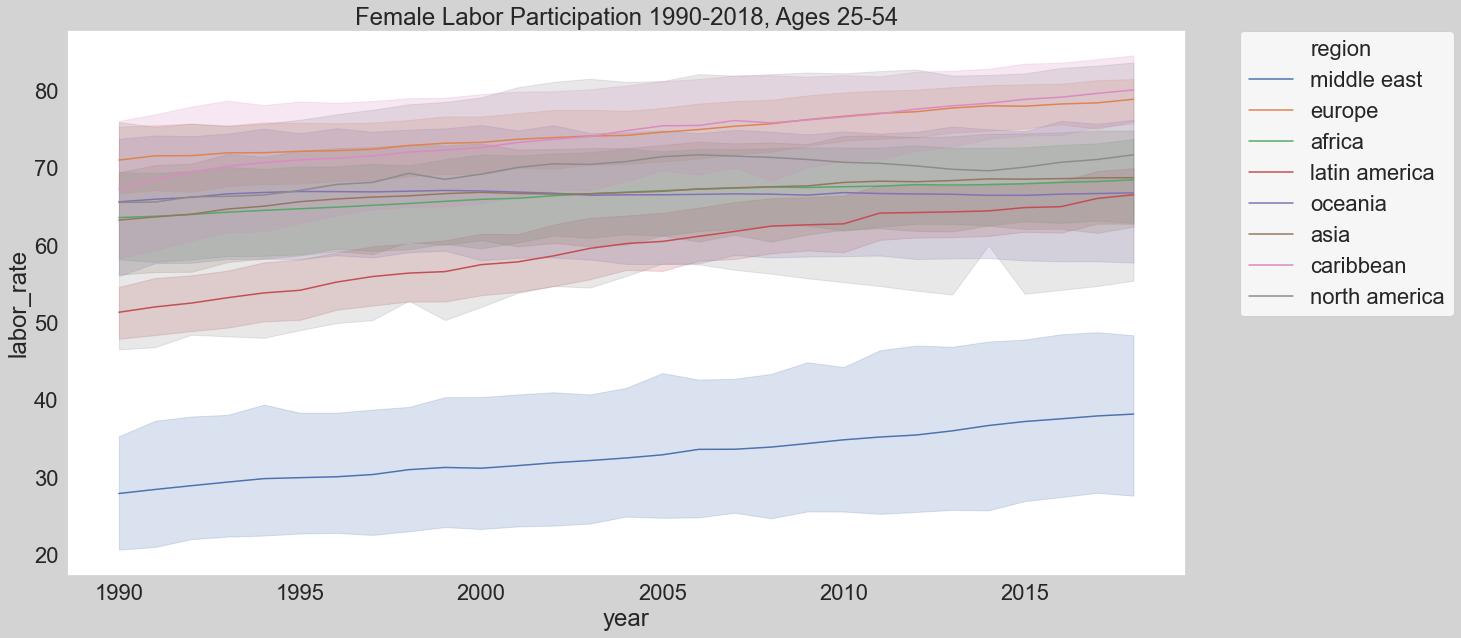

In [1033]:
plt.figure(figsize=(20,10))
sns.set(rc={'figure.facecolor':'lightgray', 'axes.facecolor':'white'}, font_scale=2)
sns.lineplot('year', 'labor_rate', data=q2_female_labor_participation_1990_2018_melted, hue='region').set(title='Female Labor Participation 1990-2018, Ages 25-54')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

<b>ANALYSIS:</b> There were two things that struck me about this. One was that the Caribbean (which is part of North America but I separated out due to the fact that it has a more recent colonial history) ended up at the top of the list, just slightly popping out over Europe. The other was exactly how far below everyone else the Middle East is (also noteworthy how wide the confidence interval is for that).

I take the Caribbean result with a grain of salt, because there are simply fewer countries, and Europe has some very large countries in it comparatively, which could skew the data, as some large countries in Eastern Europe still adhere to traditional gender roles in many segments of the population. However, I still thought it was exciting as an isolated data point. 
    
The Middle East is not exactly surprising as much as interesting. Those countries generally adhere to religious and traditional cultural norms. Anecdotally however, knowing some people from that region (mostly older gen Z and millennials, and albeit from wealthier, politically stable contries like UAE, Oman, Saudi), the women in this age range in 2022 are well educated and tend to be employed like anyone else so I was also not surprised to see that the rate of women in the workforce is steadily increasing. 


Comparing 1990 to 2018 which is the full time frame of the data

In [740]:
labor_rate_90s = q2_female_labor_participation_1990_2018_melted.loc[q2_female_labor_participation_1990_2018_melted['year'] == 1990]
labor_rate_2018 = q2_female_labor_participation_1990_2018_melted.loc[q2_female_labor_participation_1990_2018_melted['year'] == 2018]

In [938]:
#Boxplot for female labor rates 1990
plt.figure(figsize=(20,10))
sns.set(rc={'axes.facecolor':'lightblue'}, font_scale=2)
#ax = sns.boxplot(x='region', y='labor_rate', data=labor_rate_90s, palette='deep').set(title='Female Labor Rates in 1990 by Region')

<Figure size 1440x720 with 0 Axes>

In [937]:
#boxplot for female labor rates 2018
plt.figure(figsize=(20,10))
sns.set(rc={'axes.facecolor':'lightblue'}, font_scale=2)
#ax = sns.boxplot(x='region', y='labor_rate', data=labor_rate_2018, palette='deep').set(title='Female Labor Rates in 2018 by Region')

<Figure size 1440x720 with 0 Axes>

Side by side boxplot of labor rates in 2018 and 1990

In [941]:
labor_rate_merged = pd.merge(labor_rate_90s, labor_rate_2018, on=['country', 'region'], how='left')
#labor_rate_merged.head()

In [932]:
labor_rate_merged_melted = labor_rate_merged.melt(id_vars = ['country', 'region', 'labor_rate_x', 'labor_rate_y'], value_vars=['year_x', 'year_y'], var_name = 'yearxy', value_name = 'year')
labor_rate_merged_melted.rename(columns = {'labor_rate_x':'1990', 'labor_rate_y':'2018'}, inplace = True)
labor_rate_merged_melted.drop(['yearxy', 'year'], axis=1, inplace=True)

In [940]:
labor_rate_melted_again = labor_rate_merged_melted.melt(id_vars = ['country','region'],var_name='year',value_name='labor rate')

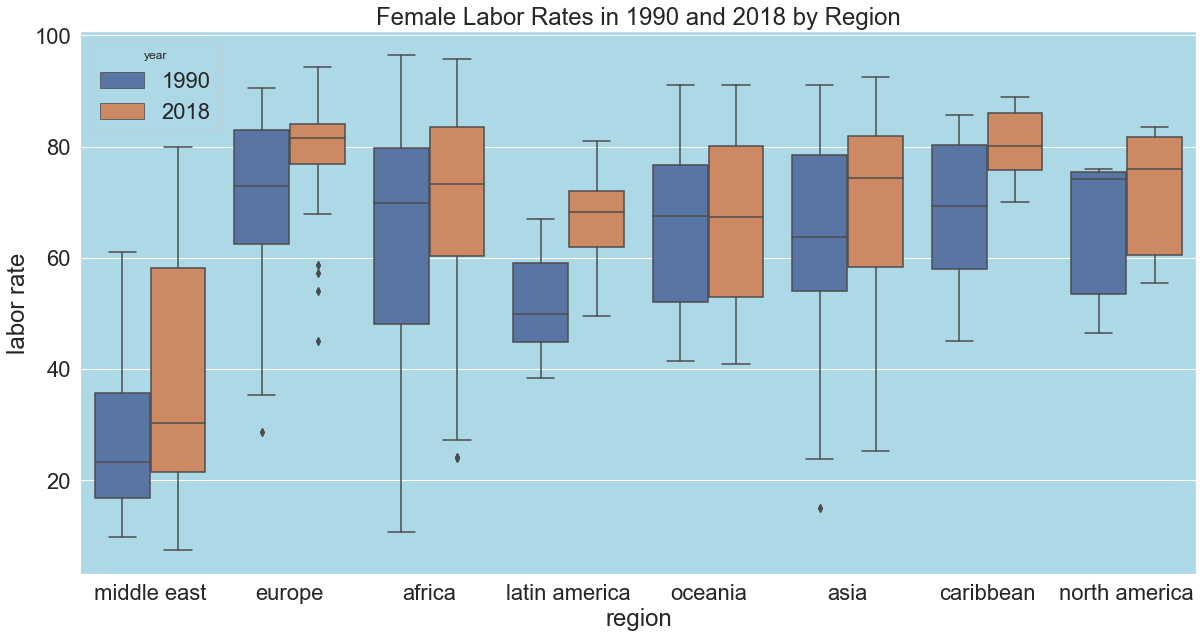

In [1021]:
plt.figure(figsize=(20,10))
sns.set(rc={'axes.facecolor':'lightblue'}, font_scale=2)
ax = sns.boxplot(x='region', y='labor rate', data=labor_rate_melted_again, palette='deep', hue='year').set(title='Female Labor Rates in 1990 and 2018 by Region')

<b>ANALYSIS:</b> Here we see some pretty remarkable shifts. Latin America completely jumped up, with the mean going from around 50 to 70%. The Middle East’s upper quartile has rocketed up more than 20% (which makes sense at least with my anecdotal experience), Africa’s mean has stayed about the same but the upper quartile has increased on its upper bound and the lower quartile has compressed into a higher range. The Caribbean as I mentioned before has jumped dramatically. I do find the string of outliers for Europe to be very interesting, and it makes me think of countries like Russia, Bulgaria, some places in the Balkans, where due to any number of factors (poverty levels, access to higher education, traditional or religious cultures) women may not have transitioned into the work force in the same numbers.

At this point I decided to compare two different regions. Latin America, because that's where I live (Panama) and the Middle East, because I have friends there and it was one of the more intriguing shifts in the above box plot.

RATES IN LATIN AMERICA

In [749]:
region_latam = q2_female_labor_participation_1990_2018_melted.loc[q2_female_labor_participation_1990_2018_melted['region'] == 'latin america']

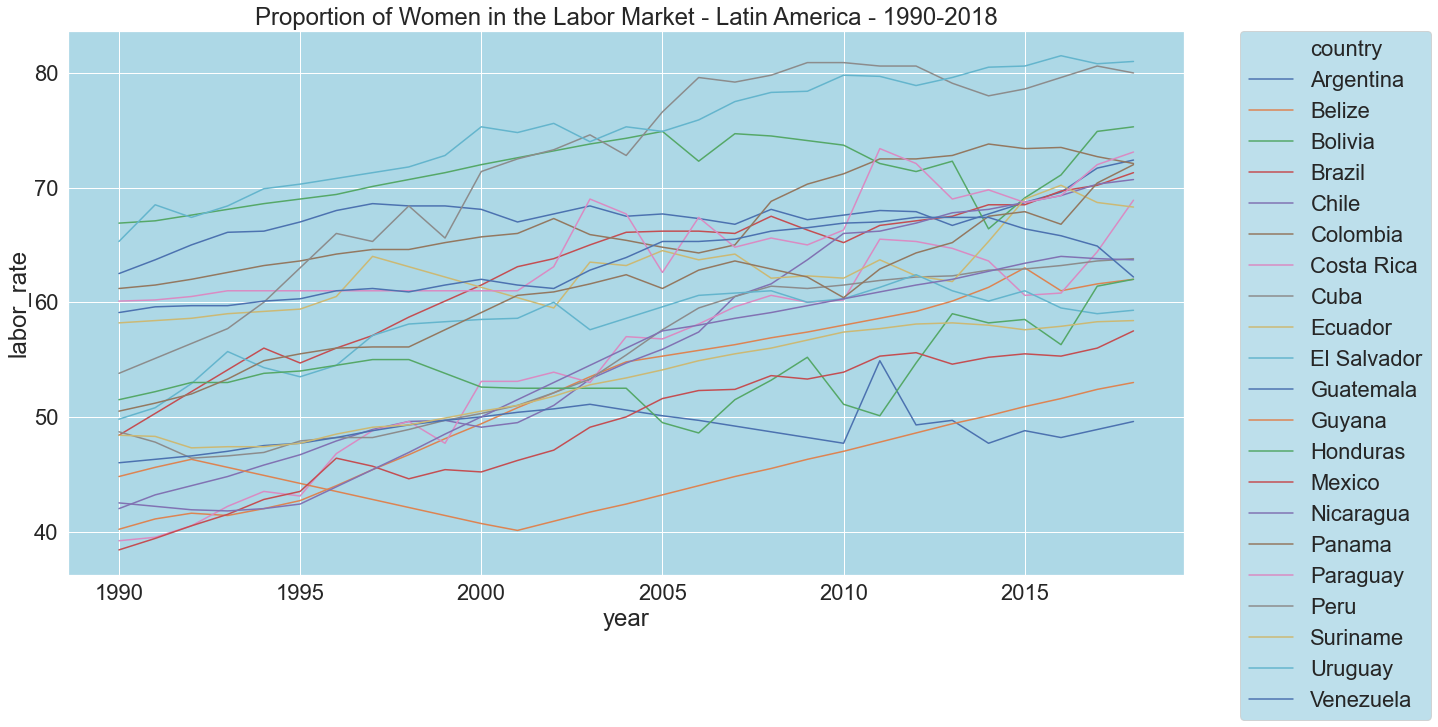

In [1022]:
plt.figure(figsize=(20,10))
sns.set(rc={'axes.facecolor':'lightblue'}, font_scale=2)
sns.lineplot('year', 'labor_rate', data=region_latam, hue='country', palette='deep').set(title='Proportion of Women in the Labor Market - Latin America - 1990-2018')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

<b>ANALYSIS:</b>There was nothing overly surprising about this, as Latin America has developed significantly in the last 30 years. It was interesting to see Mexico go from the very bottom to #7, but again not surprising. So I looked at the countries that had the minimum and maximum rates of female employment over this time period.

Finding countries that had the min and max values to look at their trajectories:

In [713]:
#region_latam['labor_rate'].max()
#region_latam['labor_rate'].min
#max returned 81.5
#min returned 38.4
region_latam.loc[region_latam['labor_rate'] == 81.5]

country         region  year  labor_rate
5093  Uruguay  latin america  2016        81.5

In [ ]:
labor_mexico = q2_female_labor_participation_1990_2018_melted.loc[q2_female_labor_participation_1990_2018_melted['country'] == 'Mexico']
labor_uruguay = q2_female_labor_participation_1990_2018_melted.loc[q2_female_labor_participation_1990_2018_melted['country'] == 'Uruguay']

[Text(0.5, 1.0, 'Uruguay vs Mexico Labor Rates')]

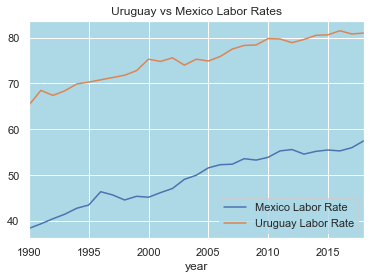

In [942]:
sns.set(rc={'axes.facecolor':'lightblue'}, font_scale=1)
ax = labor_mexico.plot(x='year', y='labor_rate', label='Mexico Labor Rate')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
labor_uruguay.plot(ax=ax, x='year', y='labor_rate', label='Uruguay Labor Rate').set(title='Uruguay vs Mexico Labor Rates')

<b>ANALYSIS:</b> So despite Mexico’s stark improvement, it is still far below Uruguay. Uruguay has long been a stable democracy with a high quality of life and a strong economy, so its starting point at a fairly high level as well as its continued improvement makes sense to me.

RATES IN THE MIDDLE EAST

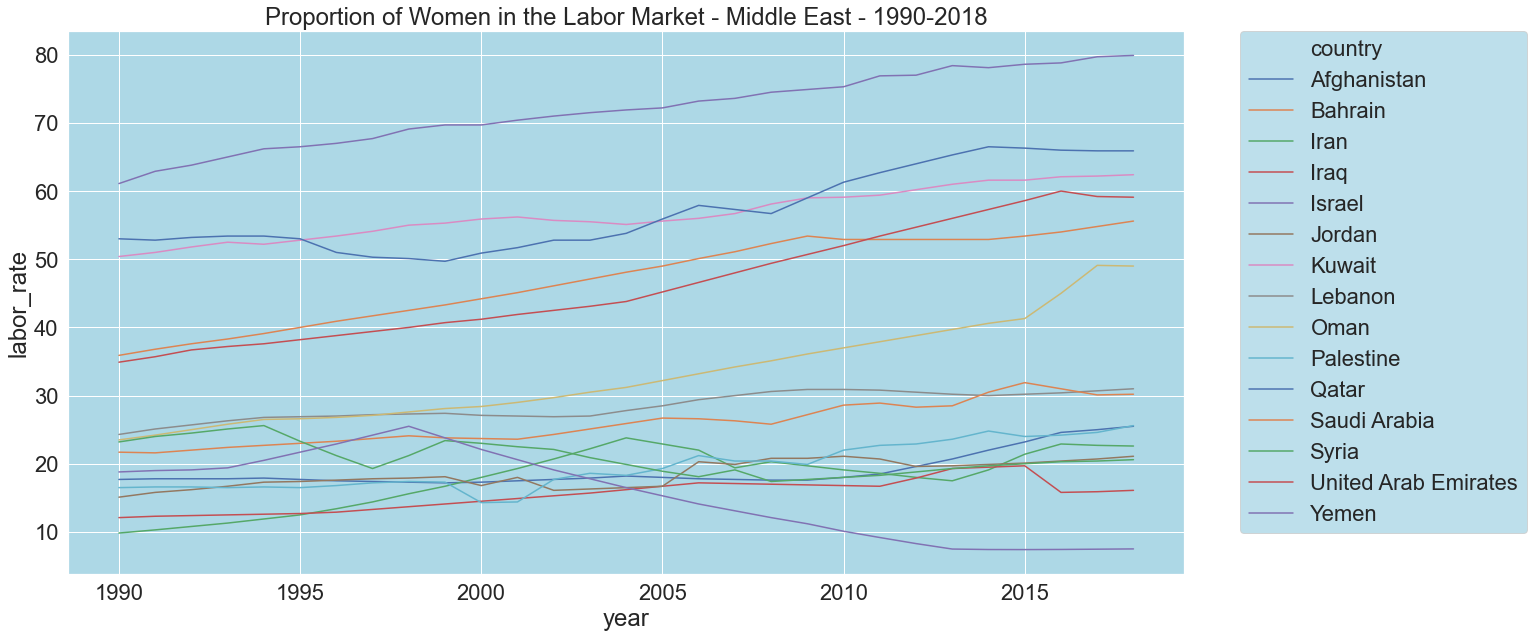

In [1023]:
plt.figure(figsize=(20,10))
sns.set(rc={'axes.facecolor':'lightblue'}, font_scale=2)
sns.lineplot('year', 'labor_rate', data=region_mideast, hue='country', palette='deep').set(title='Proportion of Women in the Labor Market - Middle East - 1990-2018')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

<b>ANALYSIS:</b> Here we can see Israel at the top of the pack, and Yemen way at the bottom. I was a bit surprised to see that there is a clump at the bottom with just a couple of countries above that. Afghanistan and the UAE are among those, which are noteworthy because of UAE’s highly developed status, and Afghanistan’s improvement in gender equality during its time as a democracy. Israel is unsurprising in its position given that it’s a fairly diverse, developed country known to be a leader in industry. 

Again I will look at min and max here.

Comparing min and max from Middle East:

In [834]:
#region_mideast['labor_rate'].max()
#region_mideast['labor_rate'].min()
#max returned 79.9
#min returned 7.41
region_mideast.loc[region_mideast['labor_rate'] == 79.9]

country       region  year  labor_rate
5373  Israel  middle east  2018        79.9

In [838]:
labor_israel = q2_female_labor_participation_1990_2018_melted.loc[q2_female_labor_participation_1990_2018_melted['country'] == 'Israel']
labor_yemen = q2_female_labor_participation_1990_2018_melted.loc[q2_female_labor_participation_1990_2018_melted['country'] == 'Yemen']

[Text(0.5, 1.0, 'Israel vs Yemen Labor Rates')]

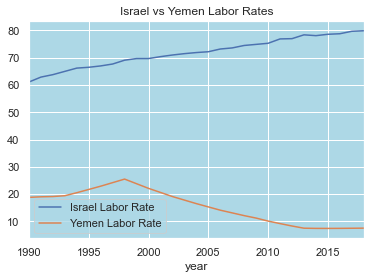

In [839]:
sns.set(rc={'axes.facecolor':'lightblue'}, font_scale=1)
ax = labor_israel.plot(x='year', y='labor_rate', label='Israel Labor Rate')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
labor_yemen.plot(ax=ax, x='year', y='labor_rate', label='Yemen Labor Rate').set(title='Israel vs Yemen Labor Rates')

<b>ANALYSIS:</b> The timeline of Yemen here is pretty depressing. They had a civil war in 1994, and after that we see a sharp increase in women entering the workforce, presumably because of civil stability, but then it peaks in the late 90s and begins to decline again. They’ve been in another series of conflicts since 2014 post-Arab-Spring which is where the rate really hits bottom and stays there. 

### Research Question 2: Is there a relationship between the average education level of women, birthrates, and the proportion of women in workforce? How is this different in different regions?

In [905]:
#q3_female_labor_participation_1990_2008_melted.head()

#merged df of school, labor participation, fertility
q3_school_laborPart_fertility_merged.head()

#school only
#q3_schooling_women_15_44_1990_2008_melted.head()

#fertility only
#q3_total_fertility_1990_2008_melted.head()

country         region  year  labor_rate  \
0  Afghanistan    middle east  1990        17.7   
1      Albania         europe  1990        72.5   
2      Algeria         africa  1990        10.7   
3       Angola         africa  1990        88.0   
4    Argentina  latin america  1990        62.5   

   avg yrs of school female 15-44  avg_children_per_woman  
0                             0.3                    7.48  
1                             8.8                    2.91  
2                             4.3                    4.48  
3                             2.5                    7.19  
4                             9.5                    2.95

In [1034]:
#created a function for the scatterplots because I used the same code basically for all three
def q2_scatterplots(xdata, ydata, x_label, y_label, plot_title):
    sns.set(rc={'axes.facecolor':'lightblue'}, font_scale=1.5)
    q3_school_laborPart_fertility_merged.plot(x=xdata, y=ydata, kind='scatter', figsize=(10,10), color='tomato').set(title=plot_title);
    plt.ylabel(y_label)
    plt.xlabel(x_label)
    plt.show()

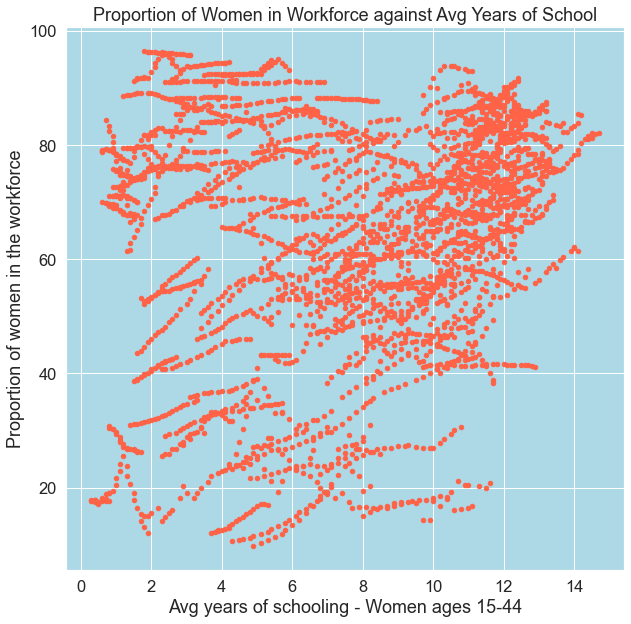

In [1035]:
q2_scatterplots('avg yrs of school female 15-44', 'labor_rate', 'Avg years of schooling - Women ages 15-44', 'Proportion of women in the workforce', 'Proportion of Women in Workforce against Avg Years of School')

<b>ANALYSIS:</b> There is not a particularly strong relationship between these variables, which makes sense; not all work requires an education. Based on the extremely high proportions of women in the workforce in this data I’m assuming that this is not strictly salaried employees and includes manual or other unskilled labor. However, there is a noticeable clumping on the upper right of the plot, where societies with a high proportion women in the workforce tend to have a higher education rate.

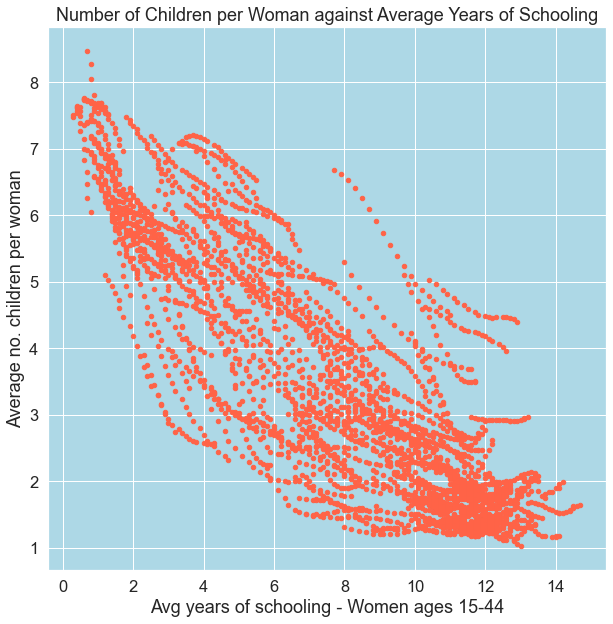

In [1036]:
q2_scatterplots('avg yrs of school female 15-44', 'avg_children_per_woman', 'Avg years of schooling - Women ages 15-44', 'Average no. children per woman', 'Number of Children per Woman against Average Years of Schooling')

<b>ANALYSIS:</b> This was probably the most striking of the three scatterplots I did, describing the relationship between birthrates and the average years of schooling that women receive. There is a stark negative correlation here, where we can see that once people achieve a high school diploma and beyond, the number of children is on average between 1-2. People having 6-8 children tend to have 6 or fewer years of education.

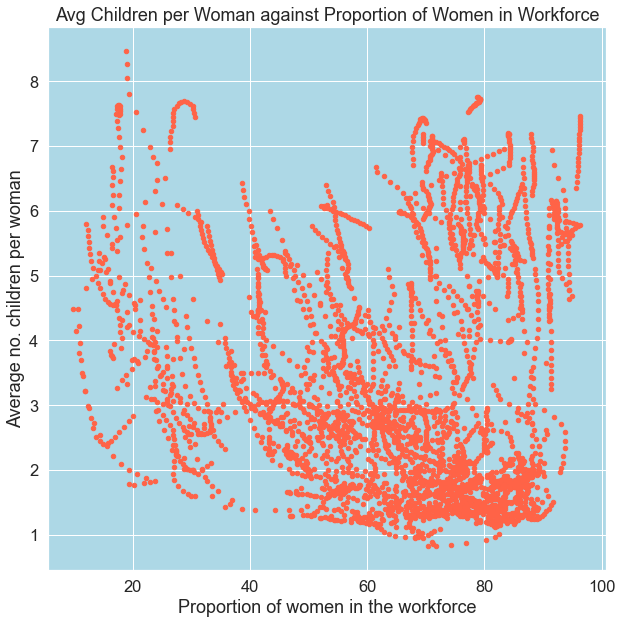

In [1037]:
q2_scatterplots('labor_rate', 'avg_children_per_woman', 'Proportion of women in the workforce', 'Average no. children per woman', 'Avg Children per Woman against Proportion of Women in Workforce')

<b>ANALYSIS:</b> Again there isn’t a strong linear relationship between these variables, but we see a noticeable clumping towards the bottom of the plot, where societies with a high percentage of employed women tend to see fewer children per women. 

I then decided to look at a particular region. Looking back to the comparative box plot at the top, Africa was another region that shifted interestingly, so I decided to look at that.

In [978]:
africa_data = q3_school_laborPart_fertility_merged.loc[q3_school_laborPart_fertility_merged['region'] == 'africa']
africa_data.rename(columns = {'avg yrs of school female 15-44':'years_school', 'avg_children_per_woman':'fertility_rate'}, inplace = True)
africa_data.head()

country  region  year  labor_rate  years_school  fertility_rate
2        Algeria  africa  1990        10.7           4.3            4.48
3         Angola  africa  1990        88.0           2.5            7.19
16         Benin  africa  1990        61.5           1.3            6.68
20      Botswana  africa  1990        58.4           5.1            4.41
24  Burkina Faso  africa  1990        84.3           0.7            6.98

Text(0, 0.5, 'Average Children per Woman')

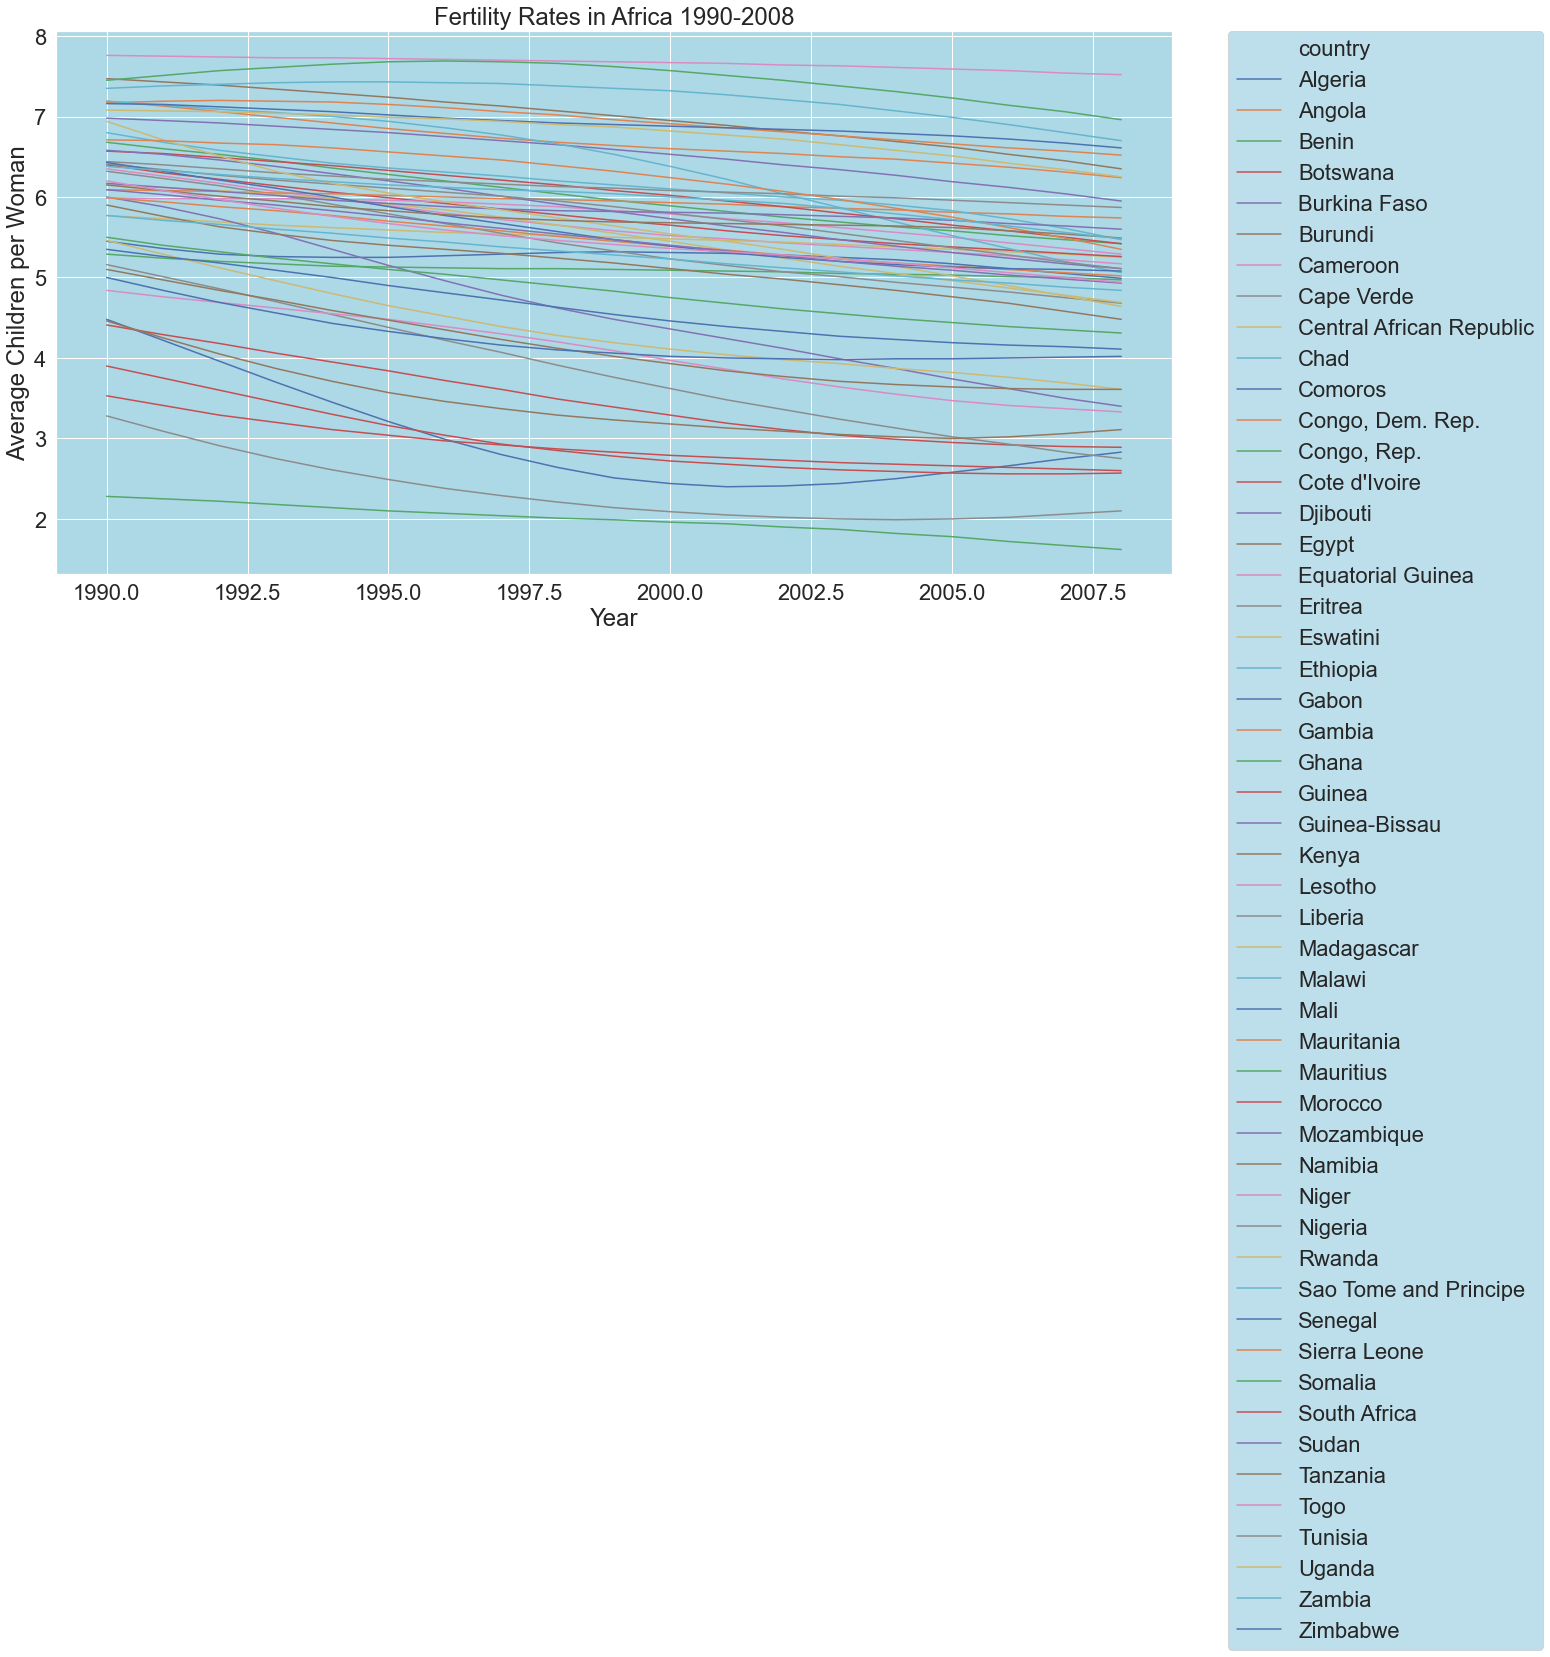

In [994]:
plt.figure(figsize=(20,10))
sns.set(rc={'axes.facecolor':'lightblue'}, font_scale=2)
sns.lineplot('year', 'fertility_rate', data=africa_data, hue='country', palette='deep').set(title='Fertility Rates in Africa 1990-2008')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.xlabel('Year')
plt.ylabel('Average Children per Woman')

<b>ANALYSIS:</b> We can see a general, if slight, decrease here. I ran the means for the dataframe (see below) and the mean fertility rate in 1990 was 5.95 children per woman, and in 2008 it was 4.81, which is a decrease of only 1.14. 

In [1006]:
africa_means = africa_data.groupby('year', as_index= False).mean()
africa_fertility.tail()
#avg fertility rate 1990 is 5.95
#avg fertility rate 2008 is 4.81
#avg education 1990 is 3.11 years of school
#avg education 2008 is 5.16 years of school

year  labor_rate  years_school  fertility_rate
14  2004   67.729412      4.707843        5.022941
15  2005   67.919608      4.825490        4.969804
16  2006   68.113725      4.931373        4.916275
17  2007   68.233333      5.052941        4.863725
18  2008   68.372549      5.158824        4.810000

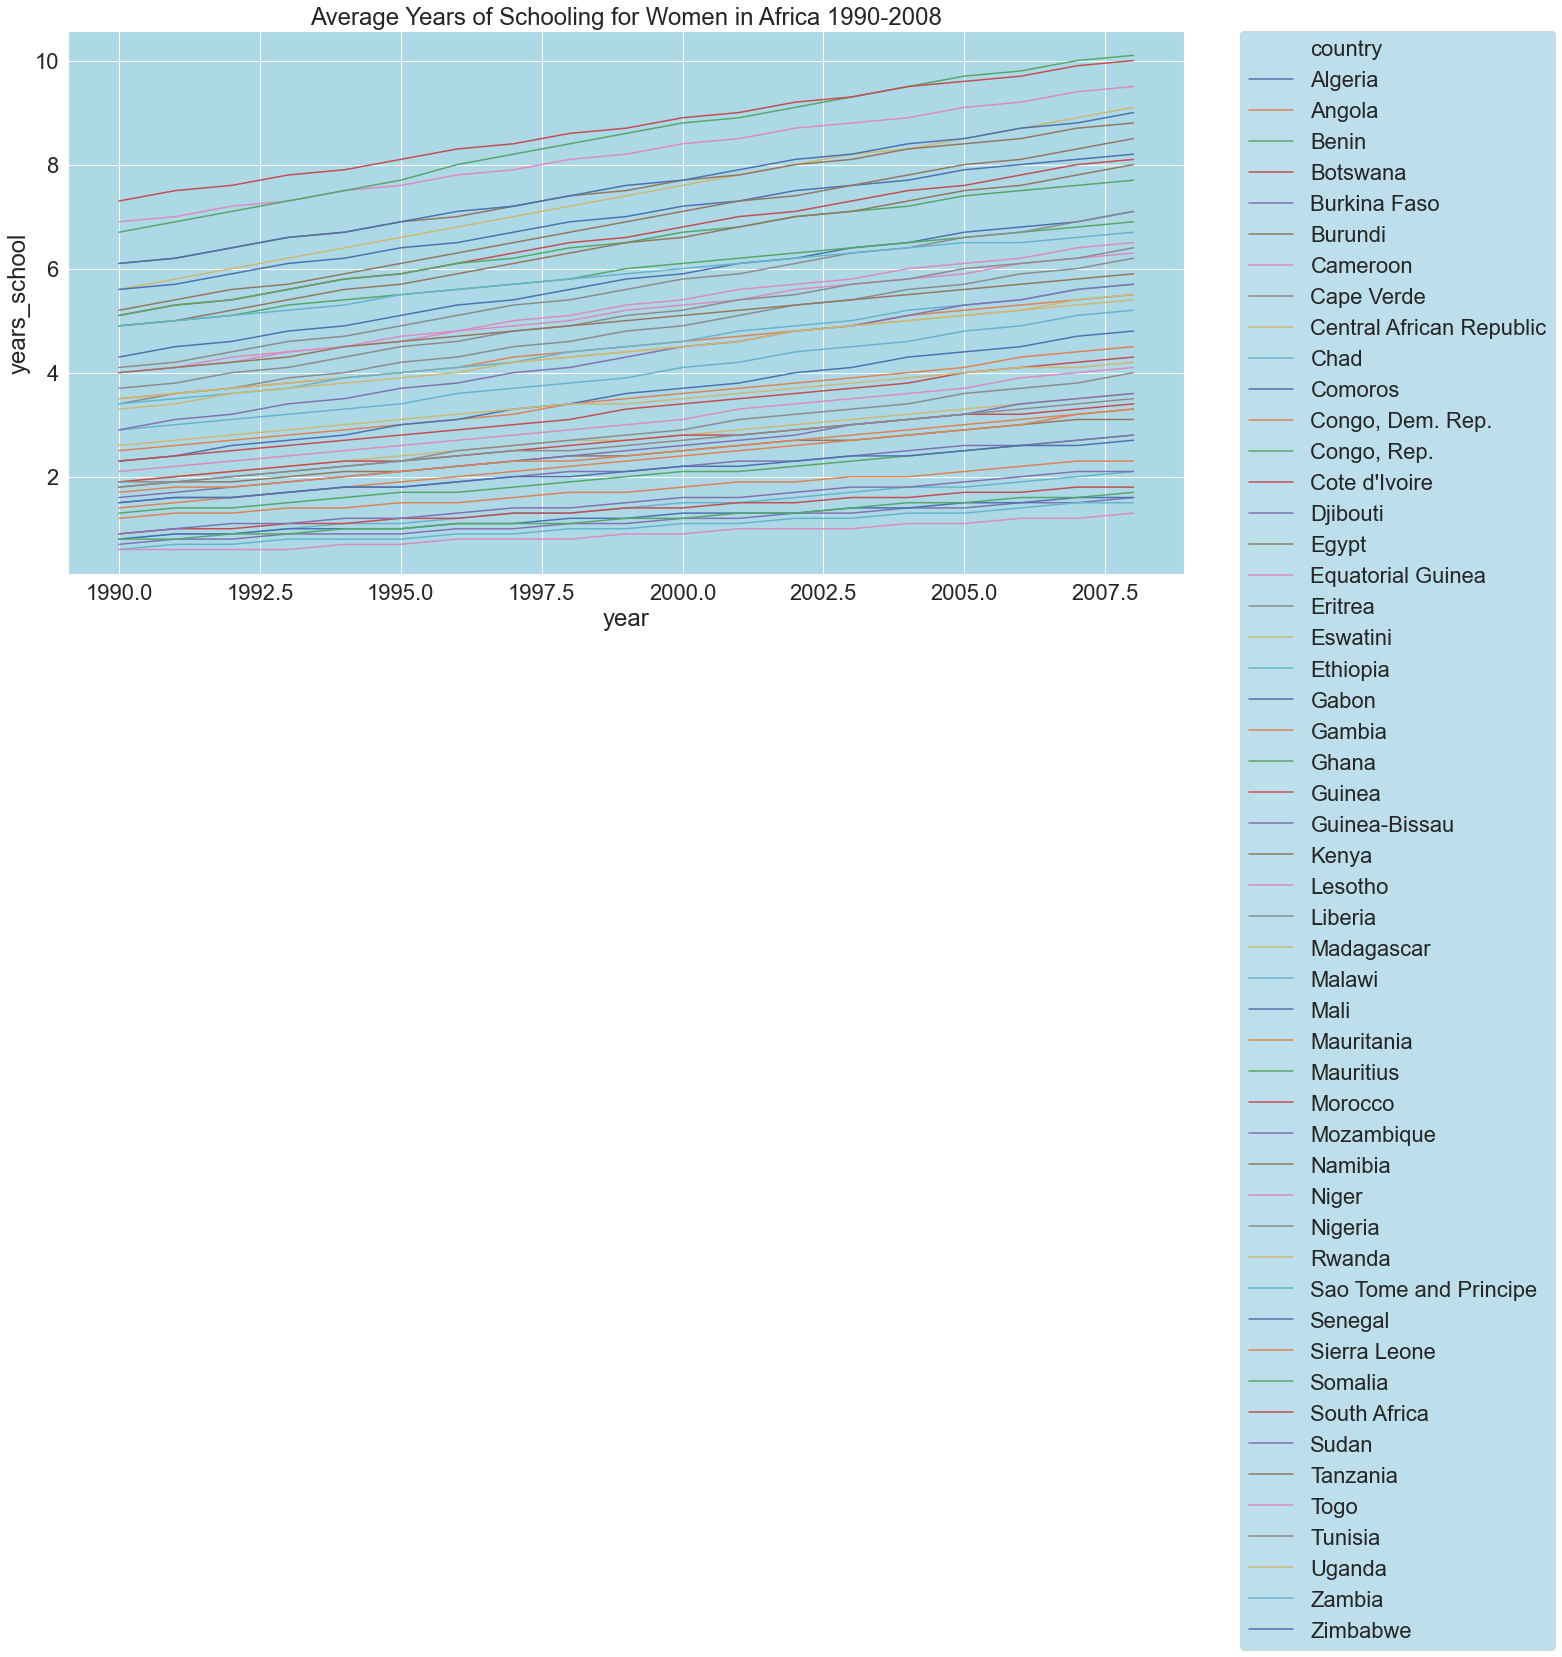

In [997]:
plt.figure(figsize=(20,10))
sns.set(rc={'axes.facecolor':'lightblue'}, font_scale=2)
sns.lineplot('year', 'years_school', data=africa_data, hue='country', palette='deep').set(title='Average Years of Schooling for Women in Africa 1990-2008')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

<b>ANALYSIS:</b> Here we can see a slightly more marked increase with years of schooling. The average years in school for girls in 1990 was 3.11, and in 2008 it was 5.16 which is an increase of 2.05. That's in a positive direction, and given how many countries are in Africa making up that mean, that could indicate some really positive shifts in certain countries (and indeed we can see very large increases in the top countries).

<a id='conclusions'></a>
## Conclusions

With both questions we can see the impact of development and modernizing culture shifts across the world, as women enter the workforce in increasing rates. Alongside this, we see education rates increasing and birthrates declining. These obviously don’t have a causal relationship to one another, but they are part of the same shift that’s allowing women to work in greater numbers. Since regions and countries develop at different rates and at different times for a variety of reasons, some shifts are more stark than others within the given time periods. I would be very interested to look at data from Europe and North America during the course of the Industrial Revolution, for example. But in general, the data here is in a positive direction and pretty optimistic.

### Limitations

The most frustrating limitation with this data is that Gapminder didn’t specify exactly what exactly constitutes “workforce.” There was another dataset in their menu for salaried workers specifically, but when I tried to go to its page, the page was blank, so I was not able to download it. Because they specifically have a dataset for salaried workers and because the proportions are so high here, I’m assuming that it includes unskilled labor as well.

It was also somewhat unhelpful that it didn’t include any grouping of the data by region or even continent, which is a somewhat obvious reference point for this type of data, so I had to add that manually.



In [1010]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295